In [1]:
!pip install numpy
!pip install matplotlib
!pip install opencv-python

In [1]:
import sys
assert sys.version_info >= (3,7)

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

if not cv.useOptimized():
    cv.setUseOptimized(True)

cv.useOptimized()

True

# Exercise 1
Apply different image smoothing techniques (e.g. average filter, Gaussian kernel and median filter) on 'noise_lena.jpg' and display the resulting images after the convolution. Comment on the outcomes and deduce the type of noise present on the image.

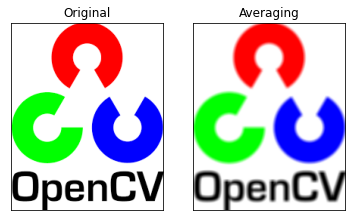

In [3]:
img = cv.imread('opencv_logo.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)    # because we are displaying using matplotlib module

kernel = np.ones((5,5), np.float32)/25
dst = cv.filter2D(img, -1, kernel)   # ddepth = -1 means that the processed image will have the same depth as the sources

plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(dst), plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

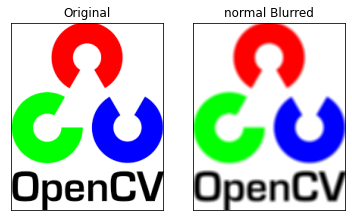

In [24]:
blur = cv.blur(img, (5,5))

plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(blur), plt.title('normal Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

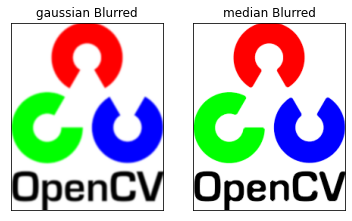

In [23]:
blur_gaussian = cv.GaussianBlur(img, (5,5),1,1)
blur_median = cv.medianBlur(img, 5,5)

plt.subplot(121), plt.imshow(blur_gaussian), plt.title('gaussian Blurred')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(blur_median), plt.title('median Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

In [25]:
kernel = np.array([[0, -1, 0],
                  [-1, 5, -1],
                  [0, -1, 0]])

img = cv.imread('butterfly.jfif')
sharp_img = cv.filter2D(img, -1, kernel)

cv.imshow('original', img)
cv.imshow('sharpening', sharp_img)

cv.waitKey(0)
cv.destroyAllWindows()

In [26]:
kernel.sum()

1

# Exercise 2
Plot the histogram of 'wood_planck.jfif'. Then, apply thresholding to segment the wooden planck.

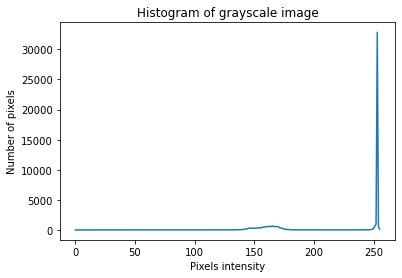

In [4]:
img_wood = cv.imread('wood_planck.jfif')

#grayscale->thresholding
gray_wood = cv.cvtColor(img_wood, cv.COLOR_BGR2GRAY)
hist = cv.calcHist([gray_wood], [0], None, [256], [0, 256])
plt.plot(hist)
plt.title('Histogram of grayscale image')
plt.xlabel('Pixels intensity')
plt.ylabel('Number of pixels')
plt.show()

In [5]:
ret, th = cv.threshold(gray_wood, 200, 255, cv.THRESH_BINARY_INV)
cv.imshow('grayscale', gray_wood)
cv.imshow('threshold', th)
cv.waitKey(0)
cv.destroyAllWindows()

# Weekly activity

Write a program to segment the boat and the people on it from the background. Follow the instruction below:
- Use 'boat.jpg' as input.
- Apply Otsu thresholding.
- Draw bounding box to identify the region where the boat and people are located.

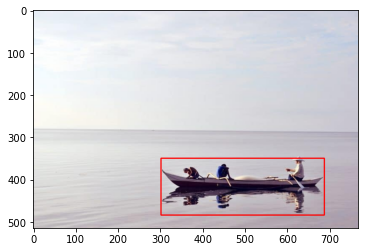

In [3]:
# get image
img_boat = cv.imread('boat.jpg')
gray_boat = cv.cvtColor(img_boat, cv.COLOR_BGR2GRAY)

# segmentation - apply otsu thresholding
blur = cv.GaussianBlur(gray_boat, (5, 5), 0)
ret, th = cv.threshold(blur, 0, 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

# dilation - eliminate defect
kernel = np.ones((5,5), np.uint8)
th = cv.dilate(th, kernel, iterations = 2)

# bounding box - con
result = img_boat.copy()
contours = cv.findContours(th, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
contours = contours[0] if len(contours) == 2 else contours[1]
for cntr in contours:
    x,y,w,h = cv.boundingRect(cntr)
    cv.rectangle(result, (x, y), (x+w, y+h), (0, 0, 255), 2)
    #print("x,y,w,h:",x,y,w,h)


cv.imshow('boat', img_boat)
cv.imshow('segmentation', th)
cv.imshow("bounding_box", result)
result = cv.cvtColor(result, cv.COLOR_BGR2RGB)
plt.imshow(result)
plt.show()
cv.waitKey(0)
cv.destroyAllWindows()

Write a program to visualize the effect of size of structuring element on the morphological transformation (e.g. erosion, dilation, opening, and closing).
- Load the 'leaf.jfif' and perform thresholding to segment the leaf from the background.
- Create a GUI containing trackbar to control the size of structuring element and display the resulting image on a window alongside the trackbar.

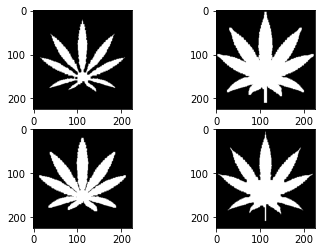

In [43]:
# get image
img_leaf = cv.imread('leaf.jfif',0)

# threshold
ret, th_leaf = cv.threshold(img_leaf, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

# erosion
kernel = np.ones((5,5), np.uint8)
erosion = cv.erode(th_leaf, kernel, iterations = 1)

# dilation
dilation = cv.dilate(th_leaf, kernel, iterations = 1)

# opening
opening = cv.morphologyEx(th_leaf, cv.MORPH_OPEN, kernel)

# closing
closing = cv.morphologyEx(th_leaf, cv.MORPH_CLOSE, kernel)

# show
#cv.imshow('leaf', img_leaf)
#cv.imshow('erosion', erosion)

img_leaf = cv.cvtColor(img_leaf, cv.COLOR_BGR2RGB)
erosion = cv.cvtColor(erosion, cv.COLOR_BGR2RGB)
dilation = cv.cvtColor(dilation, cv.COLOR_BGR2RGB)
opening = cv.cvtColor(opening, cv.COLOR_BGR2RGB)
closing = cv.cvtColor(closing, cv.COLOR_BGR2RGB)

f, ax = plt.subplots(2,2)
ax[0,0].imshow(erosion)
ax[0,1].imshow(dilation)
ax[1,0].imshow(opening)
ax[1,1].imshow(closing)

cv.waitKey(0)
cv.destroyAllWindows()

Apply the steps shown in exercise 4 to segment the porcelain from these images: "porcelain1.jfif" - "porcelain5.jfif".

In [6]:
# libraries
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
from matplotlib.colors import hsv_to_rgb

In [14]:
# defining
filename = "porcelain"
porcelain_list = []
resize_dim = (225, 225)

# import images
for i in range(1, 6):
    img_porcelain = cv.resize(cv.imread(filename + str(i) + ".jfif"), resize_dim)
    rgb_porcelain = cv.cvtColor(img_porcelain, cv.COLOR_BGR2RGB)
    porcelain_list.append(rgb_porcelain)

In [10]:
def visualising_hsv(img):
    # to hsv color
    img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
    
    # split hsv
    h, s, v = cv.split(img_hsv)
    fig = plt.figure()
    axis = fig.add_subplot(1, 1, 1, projection = "3d")
    
    # normalise
    pixel_colors = img.reshape((img.shape[0]*img.shape[1], 3))
    norm = colors.Normalize(vmin = -1., vmax=1.)
    norm.autoscale(pixel_colors)
    pixel_colors = norm(pixel_colors).tolist()

    # plot
    axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors = pixel_colors,
            marker = ".")
    axis.set_xlabel("Hue")
    axis.set_ylabel("Saturation")
    axis.set_zlabel("Value")
    plt.show()

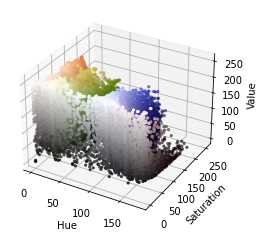

In [12]:
visualising_hsv(porcelain_list[3])

In [28]:
# segmentation funtion
def segment_porcelain(img):
    # to hsv color
    hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
    
    # define blue color
    blue_min = (50, 0, 0)
    blue_max = (150, 255, 255)
    
    # masking
    mask = cv.inRange(hsv, blue_min, blue_max)
    res = cv.bitwise_and(img, img, mask = mask)
    
    blur = cv.GaussianBlur(res, (5, 5), 0)
    return blur

# process segmentation
results = [segment_porcelain(p) for p in porcelain_list]

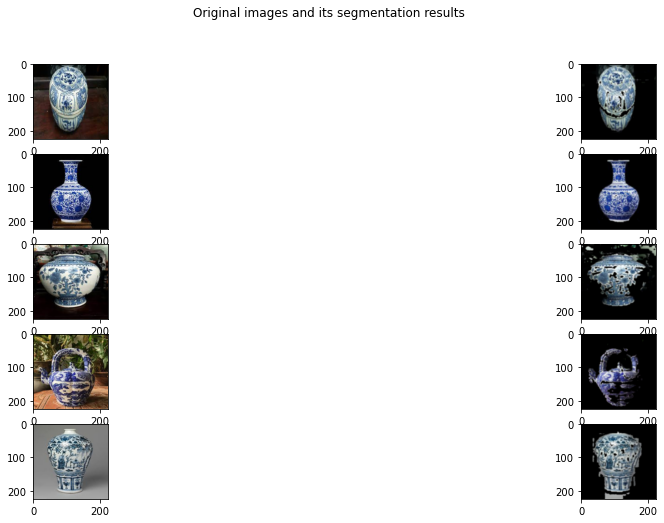

In [29]:
# display output
f, ax = plt.subplots(5, 2, figsize = (18, 8))

for i in range(5):
    ax[i][0].imshow(porcelain_list[i])
    ax[i][1].imshow(results[i])

f.suptitle('Original images and its segmentation results')
plt.show()